# HANDLING MISSING VALUES & DATA STANDARDIZATION

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset
data=pd.read_csv("Placement_Dataset.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Dataset Analysis

In [3]:
# Analysis on dataset
data.ndim

2

In [4]:
# Printing number of rows and columns
data.shape

(215, 15)

Insight: There are 215 rows and 15 columns

In [5]:
# Printing the column names
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [6]:
# Printing the column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
# Finding missing values in the entire dataset
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Insight: Denotes, salary column consists of 67 missing values

In [10]:
data.gender

0      M
1      M
2      M
3      M
4      M
      ..
210    M
211    M
212    M
213    F
214    M
Name: gender, Length: 215, dtype: object

In [11]:
data.salary.count

<bound method Series.count of 0      270000.0
1      200000.0
2      250000.0
3           NaN
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         NaN
Name: salary, Length: 215, dtype: float64>

In [12]:
# Displaying number of missing values
data["salary"].isnull().value_counts()

False    148
True      67
Name: salary, dtype: int64

Insight: Data denotes that there are 148 non missing values, and 67 missing values are there.

<AxesSubplot:>

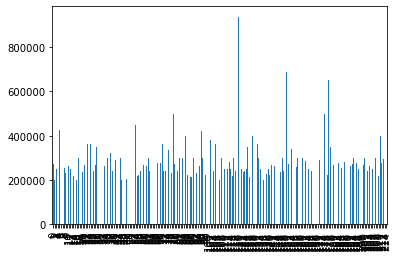

In [14]:
data["salary"].plot(kind="bar")

In [15]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [16]:
a=data.groupby(["gender"])
a.count()

,sl_no,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
gender,,,,,,,,,,,,,,
F,76,76,76,76,76,76,76,76,76,76,76,76,76,48
M,139,139,139,139,139,139,139,139,139,139,139,139,139,100


In [17]:
data.groupby("ssc_b").count()

,sl_no,gender,ssc_p,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
ssc_b,,,,,,,,,,,,,,
Central,116,116,116,116,116,116,116,116,116,116,116,116,116,78
Others,99,99,99,99,99,99,99,99,99,99,99,99,99,70


In [18]:
data["ssc_b"].unique()

array(['Others', 'Central'], dtype=object)

In [19]:
data["gender"].unique()

array(['M', 'F'], dtype=object)

In [20]:
data["specialisation"].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [21]:
df=data[(data["specialisation"]=="Mkt&HR")&(data["gender"]=="F")&(data["hsc_s"]=="Science")&(data["ssc_b"]=="Central")]
df.sort_values("salary",ascending=False).head(1)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
37,38,F,79.0,Central,76.0,Central,Science,65.6,Sci&Tech,No,58.0,Mkt&HR,55.47,Placed,320000.0


In [22]:
# Filling missing values in Salary column
data["salary"].fillna(data["salary"].median(),inplace=True)
data["salary"]

0      270000.0
1      200000.0
2      250000.0
3      265000.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214    265000.0
Name: salary, Length: 215, dtype: float64

In [23]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [24]:
data["salary"].mean()

281283.72093023255

In [25]:
data["salary"].median()

265000.0

In [26]:
data["salary"].mode()

0    265000.0
dtype: float64

C:\Users\Priya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

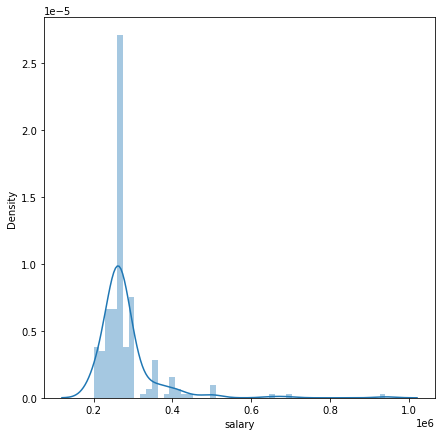

In [27]:
#Analyse the distribution of data in the salary
fig,ax=plt.subplots(figsize=(7,7))
sns.distplot(data.salary)

Insight: The curve is skew. Some outliers are there. So mean is not a good choice for filling the missed value. 

In [28]:
# Replacing missing values with median
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [29]:
data["salary"].median()

265000.0

In [30]:
data["salary"].fillna(data["salary"].median())

0      270000.0
1      200000.0
2      250000.0
3      265000.0
4      425000.0
         ...   
210    400000.0
211    275000.0
212    295000.0
213    204000.0
214    265000.0
Name: salary, Length: 215, dtype: float64

# DATA STANDARDIZATION

## The process of standardizing the data to a common format and common range.

Steps in Standardization: The value of standard deviation will fall between 0 - 1 means, all values are in common range, else by doing standardization, bring down the values range between 0-1.

- Import the necessary libraries. Important libraries are preporcessing (StandardScaler) and model_selection (train_test_split)
- Declare X with all features, except the target variable
- Declare Y with target variable
- Split the training and test data - x_train,x_test,y_train,y_test using test_train_split function
- Check the shapes of the variables
- Check the std of training data
- scaler=StandardScaler
- scaler.fit(x_train)
- StandardScaler()
- x_train_standardized=scaler.transform(x_train)
- Print and check x_train_standardized value.
- Print and check the std value
- Repeat it for x_test, y_train,y_test variables


In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.datasets

In [33]:
dataset=sklearn.datasets.load_breast_cancer()
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [34]:
# Loading data to a pandas dataframe
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
data.shape

(215, 15)

In [36]:
data.sum()

sl_no                                                         23220
gender            MMMMMMFMMMMMFFMFMFFMMFFFMFMMMMFFFFMFMFFMFFMMFF...
ssc_p                                                      14470.23
ssc_b             OthersCentralCentralCentralCentralOthersOthers...
hsc_p                                                      14261.63
hsc_b             OthersOthersCentralCentralCentralOthersOthersC...
hsc_s             CommerceScienceArtsScienceCommerceScienceComme...
degree_p                                                   14269.59
degree_t          Sci&TechSci&TechComm&MgmtSci&TechComm&MgmtSci&...
workex            NoYesNoNoNoYesNoYesNoNoYesYesNoNoNoYesYesNoNoY...
etest_p                                                    15501.62
specialisation    Mkt&HRMkt&FinMkt&FinMkt&HRMkt&FinMkt&FinMkt&Fi...
mba_p                                                      13389.81
status            PlacedPlacedPlacedNot PlacedPlacedNot PlacedNo...
salary                                          

In [37]:
X=df #X is the dataframe with all 30 columns
Y=dataset.target #Its the target, that contains the target label
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

INSIGHT: No need to standardize the target variable
         Need to standardize the other column values

### Splitting the data into training and test data

In [38]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [39]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(569, 30) (398, 30) (171, 30) (398,) (171,)


In [40]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(569, 30) (398, 30) (171, 30) (398,) (171,)


### Standardize the data

In [41]:
print(dataset.data.std())

228.29740508276657


Insight: If the data in the dataset are in the same range, then SD will be 1. 
         Here it is 228. So data in dataset are not in same range and data  
         varies a lot, hence must be standardized.

In [42]:
scaler=StandardScaler()

In [43]:
scaler.fit(X_train)

StandardScaler()

In [44]:
X_train_standardized=scaler.transform(X_train)

In [45]:
print(X_train_standardized)

[[-0.52050071  2.61299337 -0.59413687 ... -1.75285073 -0.81337285
  -0.96057522]
 [-0.64195703 -0.04489409 -0.67211879 ... -0.72132061 -0.61632348
  -0.291414  ]
 [ 1.68830951  1.14067312  1.74450397 ...  1.11657269  0.57066436
   0.49873157]
 ...
 [ 1.0838525   0.21294268  0.90752532 ...  0.01535871  3.05411192
  -1.29890313]
 [ 1.53578298  2.32383064  1.69959292 ...  1.14343157 -0.17374435
   0.80975771]
 [-0.73234313 -1.01117956 -0.73907708 ... -0.31918353 -0.41458247
  -0.38991453]]


In [46]:
X_test_standardized=scaler.transform(X_test)

In [47]:
X_test_standardized

array([[-0.99220315, -0.0424844 , -0.92647864, ..., -0.57016482,
         0.01704948, -0.50875756],
       [ 0.11785109,  0.05149349,  0.09300219, ..., -0.32127255,
        -0.71641205, -0.57513835],
       [-0.7182203 , -0.02079719, -0.72560377, ..., -0.75847539,
         0.16561844, -0.13563326],
       ...,
       [-0.25499155,  2.15274269, -0.2895583 , ..., -0.56538991,
        -0.71328428, -1.12117391],
       [-0.63913246, -0.40152813, -0.67089394, ..., -0.38901661,
         0.26883478, -0.81924837],
       [-1.53706184, -1.12684465, -1.5331861 , ..., -1.75285073,
        -0.5271821 , -0.3690367 ]])

In [48]:
print(X_train_standardized.std())

1.0


In [49]:
print(X_test_standardized.std())

0.895792182283092
